# Install and Dependency

- Creat an new python enviroment with **python version 3.11.9**
- Install **requirements.txt**

- For faster training us a Computer with **GPU**, but its also possible with **CPU**

# Imports

In [ ]:
!pip install requirements.txt

In [56]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.52.4
gast                         0.5.4
google-pasta                 0.2.0
grpcio                       1.64.0
h5py                         3.11.0
idna                         3.7
importlib_metadata           7.1.0
ipykernel                    6.29.3
ipython                      8.24.0
jedi                         0.19.1
jupyter_client               8.6.2
jupyter_core                 5.7.2
keras

In [72]:
import tensorflow as tf
import os

# Imports for Data
import numpy as np
from matplotlib import pyplot as plt

# Imports for Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Import for Evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Import for Test
import cv2

# Import for save the Model
from tensorflow.keras.models import load_model

In [2]:
print(tf.__version__)

2.16.1


In [3]:
# List all physical devices
gpus = tf.config.experimental.list_physical_devices("GPU")
cpus = tf.config.experimental.list_physical_devices("CPU")
print(gpus)
print(cpus)

[]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
# Avoid OOM errors
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
# Nice Prints

def colored_text(text, r, g, b):
    return f'\033[38;2;{r};{g};{b}m{text}\033[0m'

def print_color(text, color, title):
    
    red = [255, 0, 0]
    green = [0, 255, 0]
    yellow = [255, 255, 0]

    if color == "red":
        color_choice = red
    
    if color == "green":
        color_choice = green

    if color == "yellow":
        color_choice = yellow
        
    if title:
        char = "-"
        text_length = len(text)
        underscore = char * text_length

        print(colored_text(text, color_choice[0],color_choice[1],color_choice[2]))
        print(colored_text(underscore, color_choice[0],color_choice[1],color_choice[2]))
    else:
        print(colored_text(text, color_choice[0],color_choice[1],color_choice[2]))
    
# Beispieltext
test_text = "Hello, World!"
print_color(test_text, "red", True)
print_color(test_text, "green", False)

Hello, World!
-------------
Hello, World!


# Data
---

## Load Data
---

In [7]:
# Build a datapipline from the local System
data_test = tf.keras.utils.image_dataset_from_directory("data/Dataset/Test")
data_train = tf.keras.utils.image_dataset_from_directory("data/Dataset/Train")
data_validation = tf.keras.utils.image_dataset_from_directory("data/Dataset/Validation")

Found 10905 files belonging to 2 classes.
Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


In [8]:
test_file_size = 10905
train_file_size = 140002
validation_file_size = 39428

file_sum =  test_file_size +  train_file_size +  validation_file_size

print_color("Percentage of the data distribution","green",True)
print_color(f"Sum: {file_sum} files","green",False)
print_color(f"Test Percentage: {round((test_file_size / file_sum)*100,2)} %","green",False)
print_color(f"Train Percentage: {round((train_file_size / file_sum)*100,2)} %","green",False)
print_color(f"Validation Percentage: {round((validation_file_size / file_sum)*100,2)} %","green",False)

Percentage of the data distribution
-----------------------------------
Sum: 190335 files
Test Percentage: 5.73 %
Train Percentage: 73.56 %
Validation Percentage: 20.72 %


In [9]:
# The split looks good, but for us we want full controll, so we do the Split later and combine this datapiplines to one

data = data_train.concatenate(data_validation).concatenate(data_test)

In [10]:
# Creat an itarator over the datapipline
data_iterator = data.as_numpy_iterator()

In [11]:
# Creat a Batch to access the images
batch = data_iterator.next()

Images and their shape
----------------------
(32, 256, 256, 3)
Images classes
--------------
[0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0]
Sample Image as an array
------------------------
[[[198. 179. 164.]
  [198. 179. 164.]
  [197. 178. 163.]
  ...
  [190. 170. 159.]
  [190. 170. 159.]
  [190. 170. 159.]]

 [[198. 179. 164.]
  [198. 179. 164.]
  [197. 178. 163.]
  ...
  [190. 170. 159.]
  [190. 170. 159.]
  [190. 170. 159.]]

 [[197. 178. 163.]
  [197. 178. 163.]
  [197. 178. 163.]
  ...
  [190. 170. 159.]
  [190. 170. 159.]
  [190. 170. 159.]]

 ...

 [[194. 180. 169.]
  [190. 176. 165.]
  [189. 173. 160.]
  ...
  [165. 129. 103.]
  [162. 126. 100.]
  [161. 125.  99.]]

 [[193. 181. 169.]
  [188. 174. 163.]
  [189. 173. 160.]
  ...
  [163. 129. 102.]
  [163. 129. 102.]
  [166. 132. 105.]]

 [[187. 175. 163.]
  [184. 170. 159.]
  [188. 172. 159.]
  ...
  [163. 129. 102.]
  [165. 131. 104.]
  [171. 137. 110.]]]
Sample Image
------------


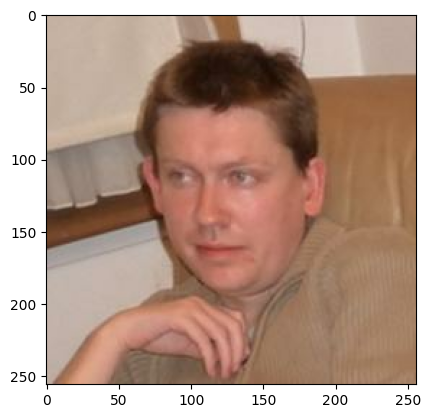

In [12]:
# Images are represented as an array
print_color("Images and their shape", "green",True)
print(batch[0].shape)

# Show the Classes
print_color("Images classes", "green", True)
print(batch[1])

print_color("Sample Image as an array","green",True)
print(batch[0][1])

print_color("Sample Image","green", True)
image = batch[0][1]
plt.imshow(image.astype(int))

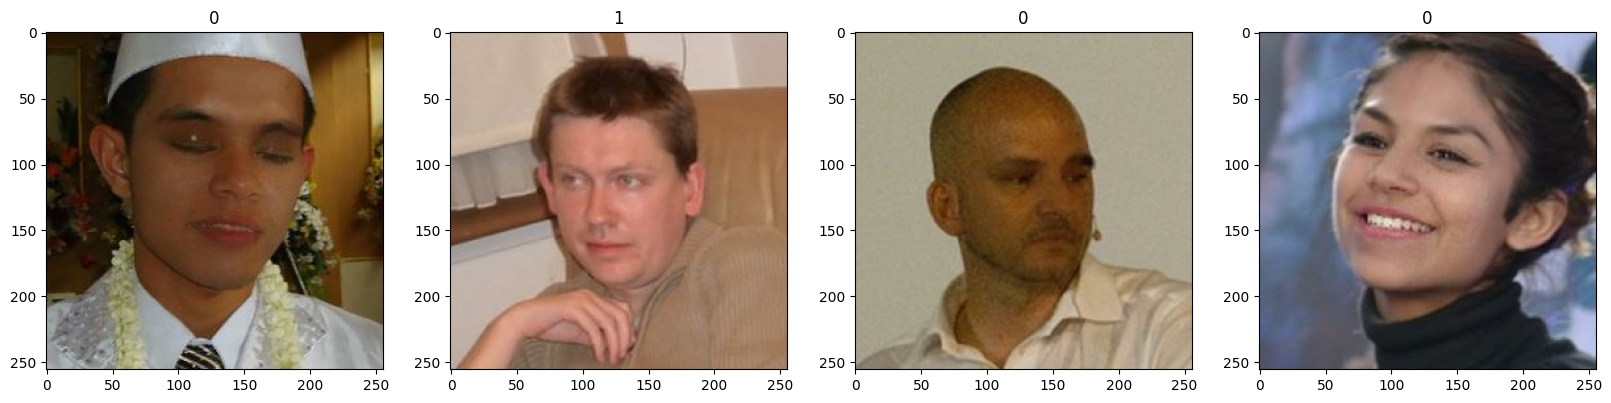

In [13]:
# Show Images an their class
# Class 0 = real
# Class 1 = fake


fig, ax = plt.subplots(ncols=4,figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data
---

### Scale Data
---

x = are the Images
y = are the Classes (fake or real)

So we do a scale directly on the datapipline with the lambda function. And we devide our Images with 255.
We want tha the Data is between 0 and 1


In [14]:
scaled_data = data.map(lambda x,y: (x/255, y))

In [15]:
# Inspect the datapipline
print_color("Unscaled images", "red", True)
print_color(f"Max: {data_iterator.next()[0].max()}","red", False)
print_color(f"Min: {data_iterator.next()[0].min()}","red", False)

scaled_itarator = scaled_data.as_numpy_iterator()
print_color("Scaled images", "green", True)
print_color(f"Max: {scaled_itarator.next()[0].max()}","green", False)
print_color(f"Min: {scaled_itarator.next()[0].min()}","green", False)

Unscaled images
---------------
Max: 255.0
Min: 0.0
Scaled images
-------------
Max: 1.0
Min: 0.0


### Split Data

Split the Data in **Train** **Validation** **Test**

- Train is used for Training the model

- Validation is used for Validate the model

- Test is used for Test the model in the end

In [16]:
# overview of the datapipline
# Total is not exact the Sum bec. thre is one batch with less then 32 Images

scaled_data_iterator = scaled_data.as_numpy_iterator()
scaled_batch = scaled_data_iterator.next()

print_color("Datapipline overview", "green" ,True)
print_color(f"Size of the datapipline in Batches: {len(scaled_data)}","green",False)
print_color(f"Images in one Batch: {scaled_batch[0].shape[0]}","green",False)
print_color(f"Total images in the datapipline: {scaled_batch[0].shape[0] * len(scaled_data)}","green",False)


Datapipline overview
--------------------
Size of the datapipline in Batches: 5950
Images in one Batch: 32
Total images in the datapipline: 190400


In [21]:
# Calculate the Split

# 70% Train Size
train_size = int(len(scaled_data)*0.7)

# 20% Validation Size
validation_size = int(len(scaled_data)*0.2)

# 10% Test Size
test_size = int(len(scaled_data)*0.1)

size_sum = train_size + validation_size + test_size

print_color("Splits in Batches | in Percentage", "green", True)
print_color(f"Train Size: {train_size} | {round((train_size / size_sum)*100,2)} %", "green", False)
print_color(f"Validation Size: {validation_size} | {round((validation_size / size_sum)*100,2)} %", "green", False)
print_color(f"Test Size: {test_size} | {round((test_size / size_sum)*100,2)} %", "green", False)
print_color("Compare Sum and Total size of Datapipline", "yellow", True)
print_color(f"Sum: {size_sum}", "yellow", False)
print_color(f"Totla size of Datapipline: {len(scaled_data)}", "yellow", False)

Splits in Batches | in Percentage
---------------------------------
Train Size: 4165 | 70.0 %
Validation Size: 1190 | 20.0 %
Test Size: 595 | 10.0 %
Compare Sum and Total size of Datapipline
-----------------------------------------
Sum: 5950
Totla size of Datapipline: 5950


In [26]:
# Split the Data

train_data = scaled_data.take(train_size)

validation_data = scaled_data.skip(train_size).take(validation_size)

test_data = scaled_data.skip(train_size+validation_size).take(test_size)

print_color("Check if it's Correct","green", True)
print_color(f"Train: {len(train_data)}", "green", False)
print_color(f"Validation: {len(validation_data)}", "green", False)
print_color(f"Test: {len(test_data)}", "green", False)


Check if it's Correct
---------------------
Train: 4165
Validation: 1190
Test: 595


# Model
---


## Build Model
---

In [34]:
# Initialize the Model
model = Sequential()

In [35]:
# Adding the layers to the Model
model.add(Conv2D(16,(3,3),1, activation="relu", input_shape=(256, 256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))

# Output 0 or 1, real or fake
model.add(Dense(1, activation="sigmoid"))

In [36]:
# Compile Model
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [38]:
# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model
---

In [42]:
# Set logdir for Logging
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Start training the Model
hist = model.fit(train_data, epochs=20, validation_data=validation_data, callbacks=[tensorboard_callback])

## Performance of the Model
---

### Loss
---


In [ ]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", lable="loss")
plt.plot(hist.history["val_loss"], color="orange", lable="validation loss")
fig.subtitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

### Accuracy
---

In [ ]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", lable="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", lable="validation accuracy")
fig.subtitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

# Results
---

## Evaluation
---

In [48]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [49]:
len(test_data)

595

In [ ]:
for batch in test_data.as_numpy_iterator():
    X, y  = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

In [53]:
print_color("Check Test Metrics", "green", True)
print_color(f"Precision: {(precision.result().numpy())*100} %","green",False)
print_color(f"Recall: {(recall.result().numpy())*100} %","green",False)
print_color(f"Accuracy: {(accuracy.result().numpy())*100} %","green",False)

Check Test Metrics
------------------
Precision: 0.0 %
Recall: 0.0 %
Accuracy: 0.0 %


## Test
---

In [67]:
img_fake = cv2.imread("test/fake_15.jpg")
img_real = cv2.imread("test/real_5.jpg")

img_fake = cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB)
img_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)

In [68]:
# Resize Image if necessary
resize_fake = tf.image.resize(img_fake, (256, 256))
resize_real = tf.image.resize(img_real, (256, 256))


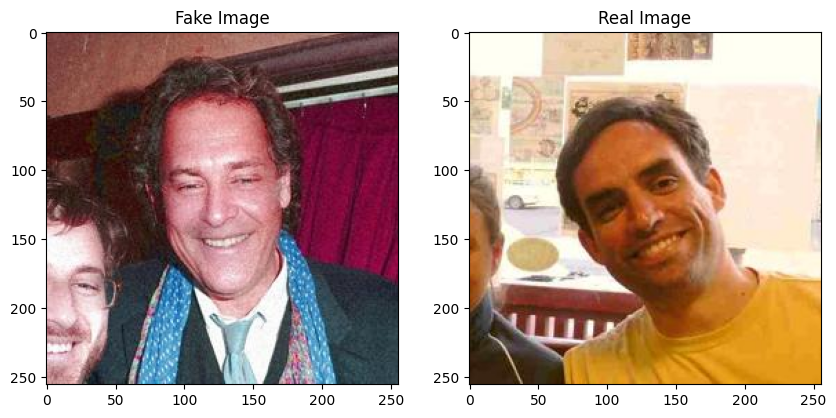

In [69]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(resize_fake.numpy().astype(int))
axes[0].set_title('Fake Image')


axes[1].imshow(resize_real.numpy().astype(int))
axes[1].set_title('Real Image')


plt.show()

In [ ]:
yhat_fake = model.predict(np.expand_dims(resize_fake / 255, 0))
yhat_real = model.predict(np.expand_dims(resize_real / 255, 0))

In [71]:
print_color("Test result", "green", True)
print_color(f"Fake: {yhat_fake}","red", False)
print_color(f"Real: {yhat_real}","yellow", False)

Test result
-----------


NameError: name 'yhat_fake' is not defined

# Save the Model
---

In [ ]:
model.save(os.path.join("models", "deepfake-detection-v1.h5"))